# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import time
from collections import deque

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from unityagents import UnityEnvironment

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_20_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
## Define the training function
def ddpg(n_episodes=2000, max_t=1000):
    """Deep Deterministic Policy Gradients (DDPG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []      # episodic scores
    moving_avg = []  # moving average over 100 episodes and over all agents

    ## Perform n_episodes of training
    time_training_start = time.time()
    for i_episode in range(1, n_episodes+1):
        time_episode_start = time.time()
        agent.noise.reset()
        states = env.reset(train_mode=True)[brain_name].vector_observations
        scores_episode = np.zeros(num_agents)           # rewards per episode for each agent

        for t in range(max_t):
            # Perform a step: S;A;R;S'
            actions = agent.act(states)                 # select the next action for each agent
            env_info = env.step(actions)[brain_name]    # send the actions to the environment
            rewards = env_info.rewards                  # get the rewards
            next_states = env_info.vector_observations  # get the next states
            # Send the results to the Agent
            for (state, action, reward, next_state) \
                    in zip(states, actions, rewards, next_states):
                agent.step(state, action, reward, next_state)
            # Update the variables for the next iteration
            states = next_states
            scores_episode += rewards

        # Store the rewards and calculate the moving average
        scores.append(scores_episode.tolist())
        moving_avg.append(np.mean(scores[-100:], axis=0))
        # Calculate the elapsed time
        time_episode = time.time() - time_episode_start
        time_elapsed = time.time() - time_training_start
        time_episode_str = time.strftime('%Mm%Ss', time.gmtime(time_episode))
        time_elapsed_str = time.strftime('%Mm%Ss', time.gmtime(time_episode))

        ## Print the results for this episode
        print('Episode {:3d} ({})\tScore: {:5.2f} (H: {:5.2f} / L: {:5.2f})\t' \
              'Moving average: {:5.2f} (H: {:5.2f} / L: {:5.2f})' \
              .format(i_episode, time_episode_str, scores_episode.mean(),
                      scores_episode.max(), scores_episode.min(),
                      moving_avg[-1].mean(), moving_avg[-1].max(),
                      moving_avg[-1].min()))

        ## Check if the environment has been solved
        if moving_avg[-1].mean() >= 30.0 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                  .format(i_episode-100, moving_avg[-1].mean()))
            break

    return scores, moving_avg

In [6]:
# Create the Agent
agent = Agent(state_size, action_size, random_seed=0)

# Train the Agent
scores, moving_avg = ddpg(20, 200)

Actor network built: ModuleList(
  (0): Linear(in_features=33, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=4, bias=True)
)
Actor network built: ModuleList(
  (0): Linear(in_features=33, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=4, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=33, out_features=128, bias=True)
  (1): Linear(in_features=132, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=1, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=33, out_features=128, bias=True)
  (1): Linear(in_features=132, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=1, bias=True)
)
Episode   1 (00m26s)	Score:  0.08 (H:  0.57 / L:  0.00)	Moving average:  0.08 (H:  0.57 / L:  0.00)
Episode   2 (00m26s)	Score:  0.13 (H:  0.66 / L:  

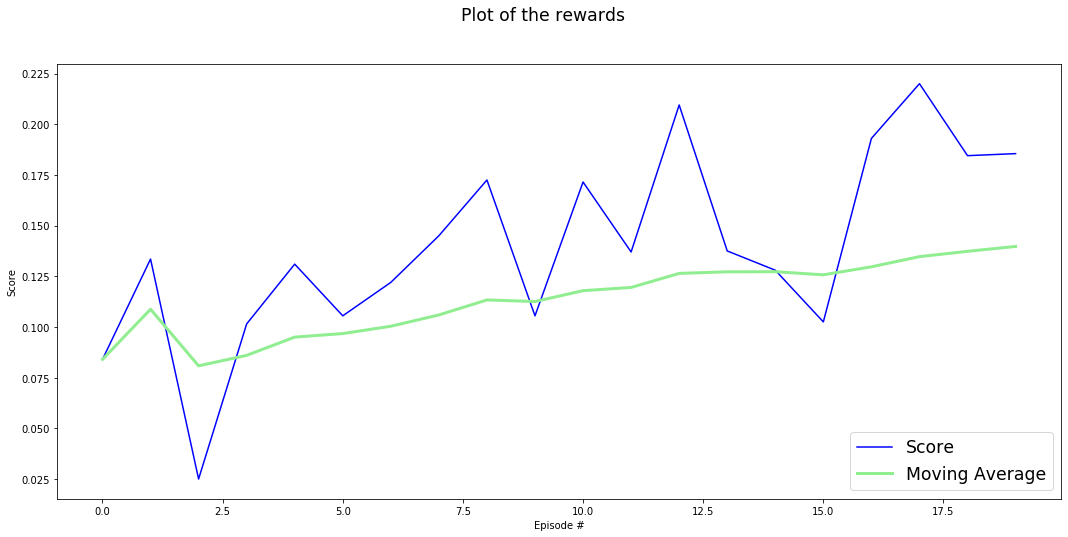

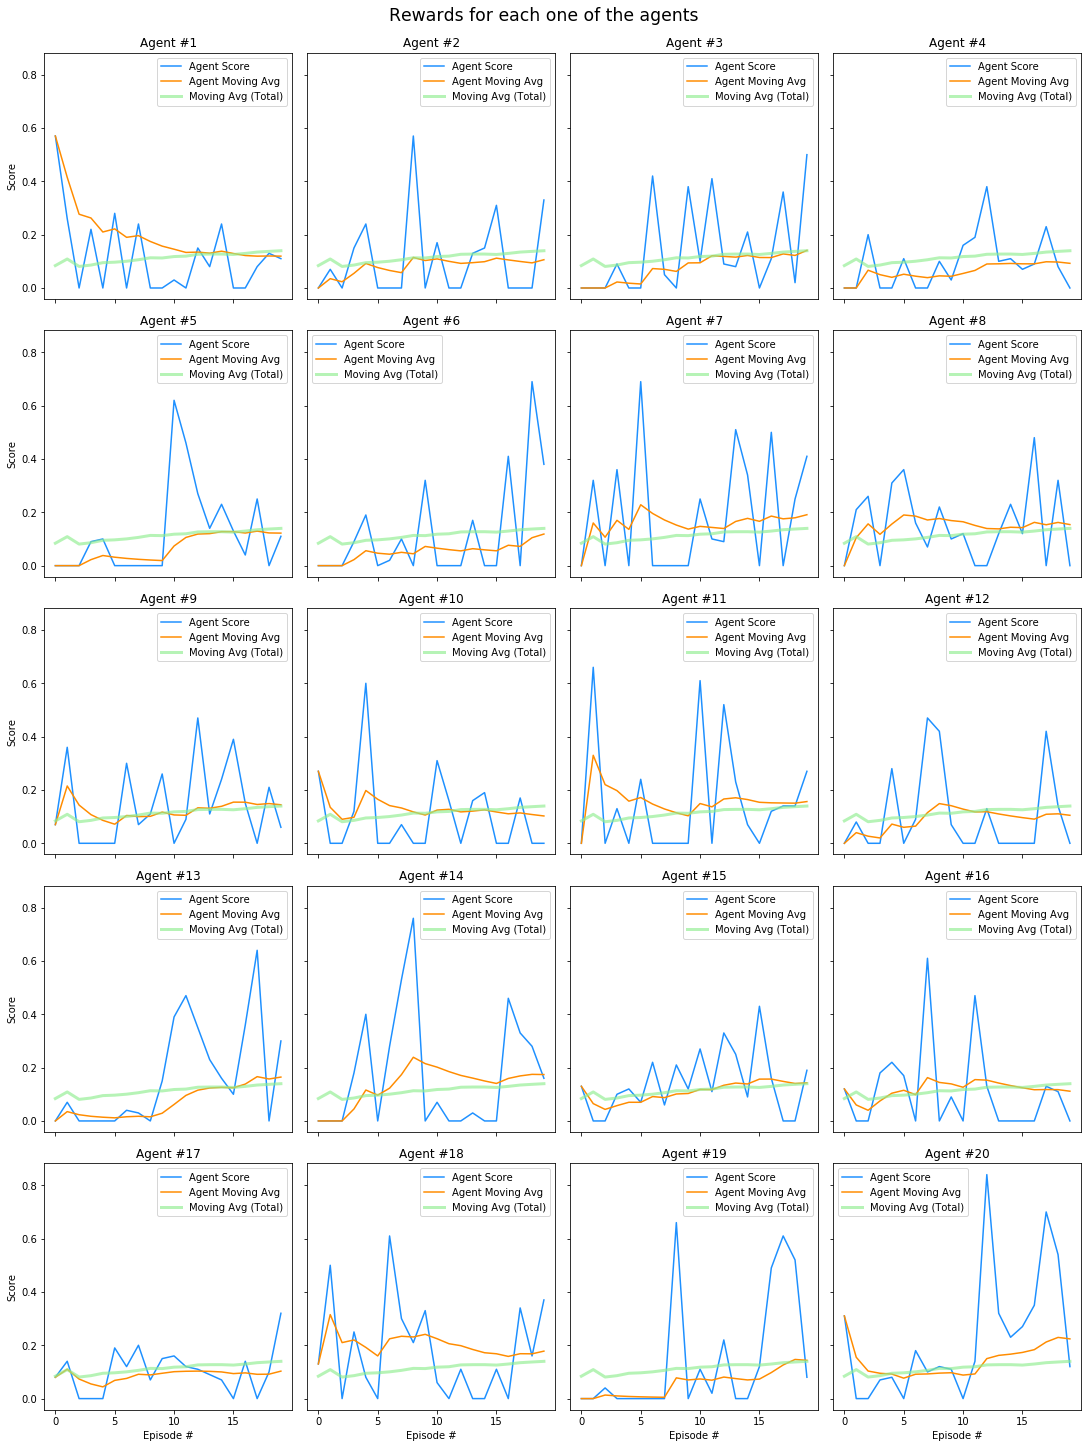

In [13]:
# Preprocess some variables
scores_mean = np.mean(scores, axis=1)
moving_avg_mean = np.mean(moving_avg, axis=1)
target = [30] * len(scores) # Trace a line indicating the target value

# Plot the main graph with the scores and moving average
fig = plt.figure(figsize=(18,8))
fig.suptitle('Plot of the rewards', fontsize='xx-large')

ax = fig.add_subplot(111)
ax.plot(scores_mean, label='Score', color='Blue')
ax.plot(moving_avg_mean, label='Moving Average',
        color='LightGreen', linewidth=3)
# ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
# ax.text(0, target[0]+1, 'Target', color='LightCoral', fontsize='large')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.legend(fontsize='xx-large', loc='lower right')

plt.show()

# Plot one graph for each one of the 20 Agents, if that is the case
if len(scores[0]) == 20:
    fig, axs = plt.subplots(5, 4, figsize=(15, 20),
                            constrained_layout=True, sharex=True, sharey=True)
    fig.suptitle('Rewards for each one of the agents', fontsize='xx-large')

    axs = axs.flatten()
    for idx, (ax, s, m) \
            in enumerate(zip(axs, np.transpose(scores), np.transpose(moving_avg))):
        ax.plot(s, label='Agent Score', color='DodgerBlue')
        ax.plot(m, label='Agent Moving Avg', color='DarkOrange')
        ax.plot(moving_avg_mean, label='Moving Avg (Total)',
                color='LightGreen', linewidth=3, alpha=0.655)
        # ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
        # ax.text(0, target[0]+1, 'Target', color='LightCoral', fontsize='large')

        ax.set_title('Agent #%d' % (idx+1))
        ax.set_ylabel('Score')
        ax.set_xlabel('Episode #')
        ax.label_outer()
        ax.legend(fontsize='medium')

    plt.show()

In [14]:
env.close()